In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(0)

In [2]:
data=pd.read_excel(r"c:\Users\acer\Downloads\Concrete_Data.xls")

In [4]:
data.columns = ['Cement',
       'Blast_Furnace_Slag',
       'Fly_Ash',
       'Water',
       'Superplasticizer',
       'Coarse_Aggregate',
       'Fine_Aggregate','Age',
       'Concrete_compressive_strength']

In [5]:
data.corr()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast_Furnace_Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly_Ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse_Aggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine_Aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
Concrete_compressive_strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


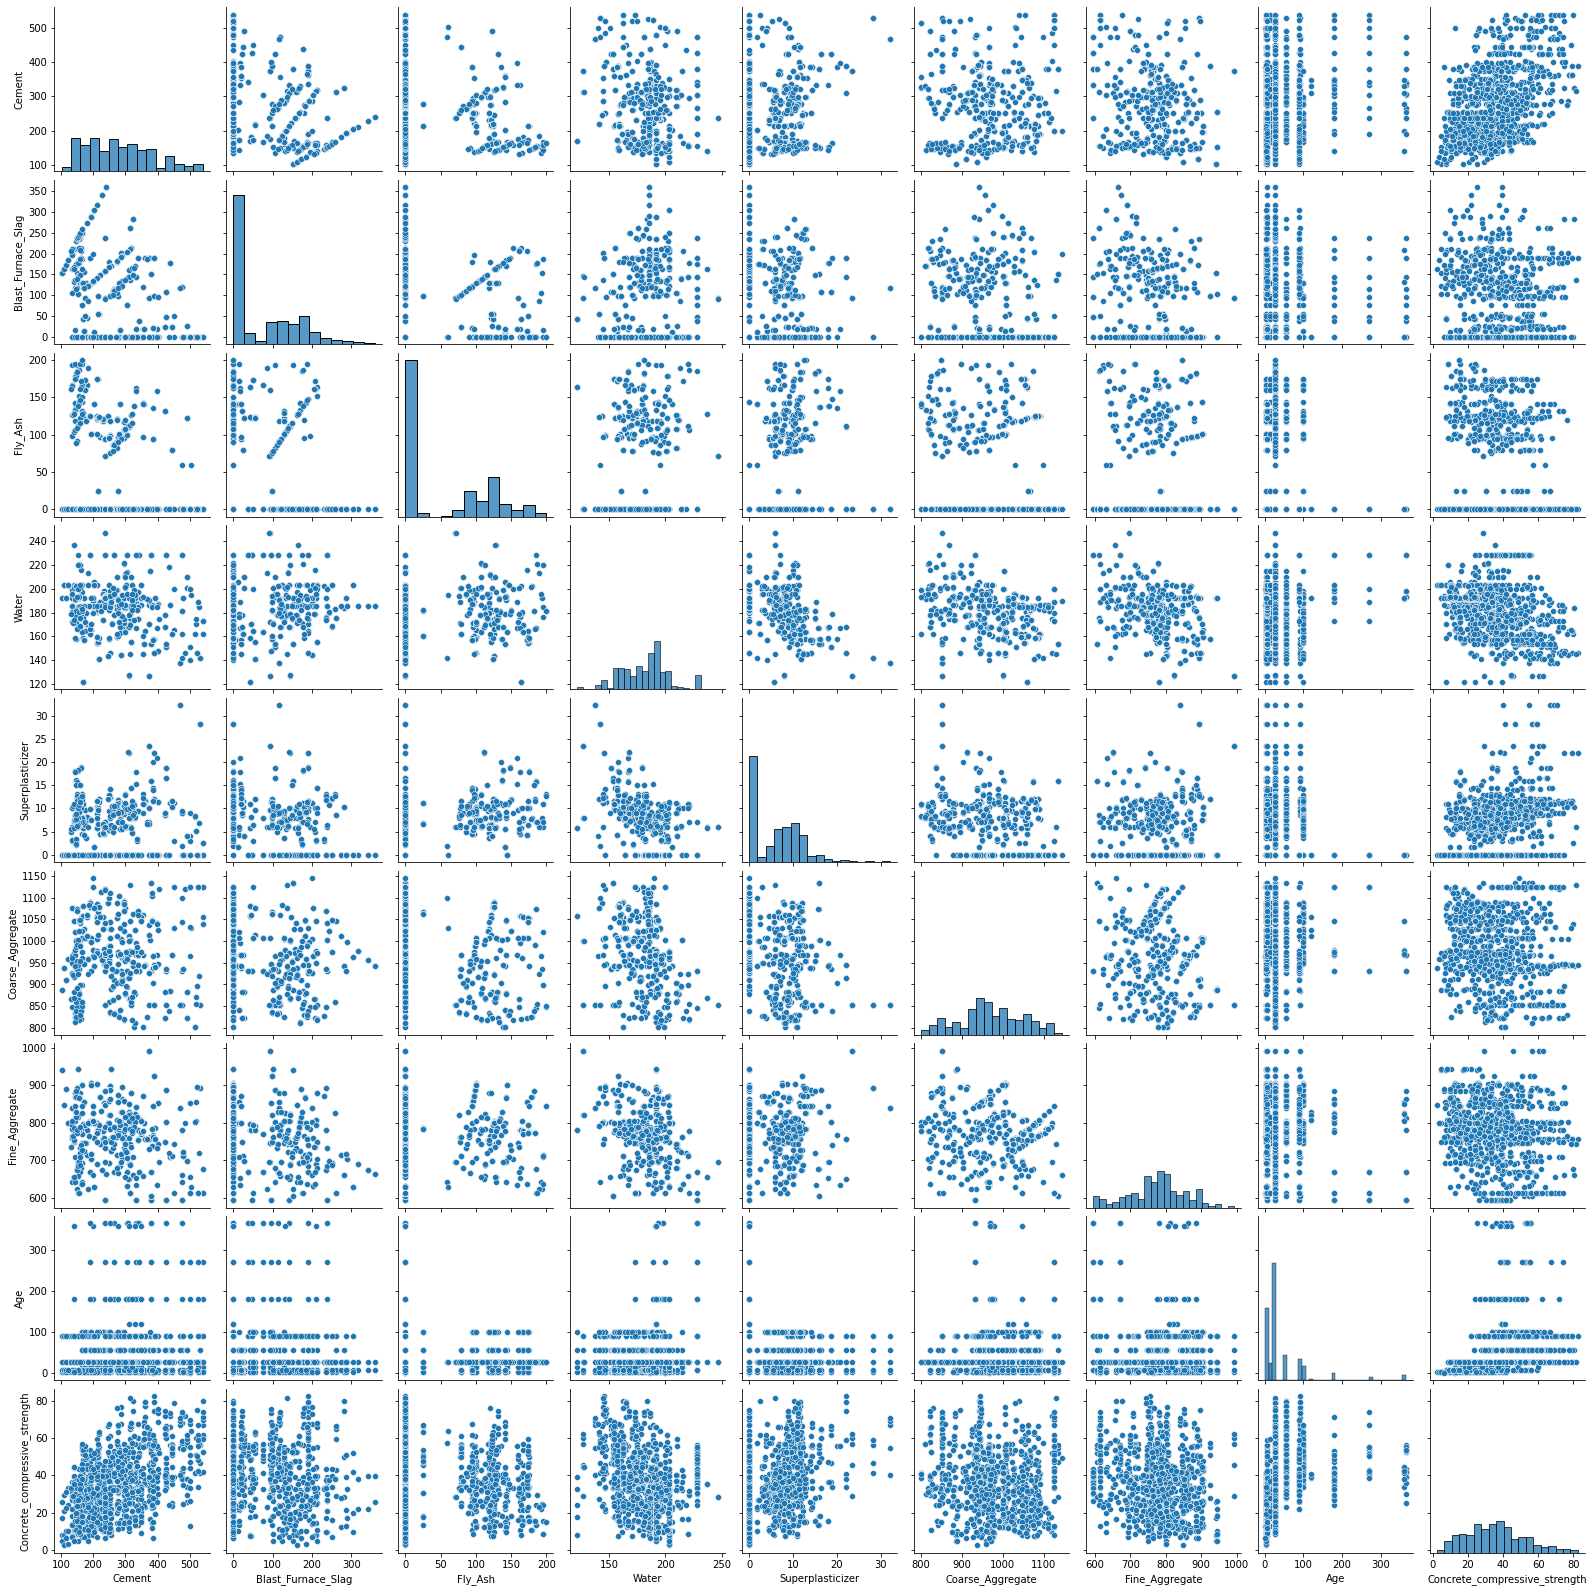

In [6]:
sns.pairplot(data)

In [7]:
X=data[['Cement','Superplasticizer','Age']]
Y=data[['Concrete_compressive_strength']]

In [9]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=1)

In [10]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [13]:
rf_model=RandomForestRegressor(max_depth=3,n_estimators=100,random_state=2)
rf_model.fit(Xtrain,Ytrain.values.ravel())
yhat=rf_model.predict(Xtest)

print("MSE:",mean_squared_error(yhat,Ytest))
print("MAE:",mean_absolute_percentage_error(yhat,Ytest))
print("R2_Score:",r2_score(yhat,Ytest))
print("Training Accuracy")
print(rf_model.score(Xtrain,Ytrain.values.ravel()))
print("Testing Accuracy")
rf_model.score(Xtest,Ytest)



MSE: 102.79154610242765
MAE: 0.23082926437571072
R2_Score: 0.3647756239353198
Training Accuracy
0.6953754394740398
Testing Accuracy


0.605703813077237